<a href="https://colab.research.google.com/github/araldi/HS22_Big-Data-analysis-in-Biomedical-Research/blob/main/Homework/Week5_homework_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load the dataset and the dictionary to decode the columns.

```
df = pd.read_csv('https://github.com/araldi/HS21---Big-Data-Analysis-in-Biomedical-Research-376-1723-00L-/blob/main/Week5/Week5_statistics_exercise.csv?raw=true')
```




```
df_dict = pd.read_csv('https://raw.githubusercontent.com/araldi/HS21---Big-Data-Analysis-in-Biomedical-Research-376-1723-00L-/main/Week5/df_dictionary.csv')

```




# Exercise 1
### Part a

Sample 25 individuals among males and 25 individuals among females and perform an appropriate test to check whether the two sampled cohorts have the same height.

* Plot the height of the two sampled cohorts.

* Which statistical test are you going to use?

* State the null hypothesis, state the alternate hypothesis.

* Define the significance threshold.



* How do you interpret the results?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.weightstats import ztest



df = pd.read_csv('https://github.com/araldi/HS21---Big-Data-Analysis-in-Biomedical-Research-376-1723-00L-/blob/main/Week5/Week5_statistics_exercise.csv?raw=true')
df_dict = pd.read_csv('https://raw.githubusercontent.com/araldi/HS21---Big-Data-Analysis-in-Biomedical-Research-376-1723-00L-/main/Week5/df_dictionary.csv')



In [2]:
df.head()

,Unnamed: 0,eid,31-0.0,48-0.0,49-0.0,50-0.0,2443-0.0,21002-0.0,21022-0.0,23099-0.0,30740-0.0,30750-0.0,30760-0.0,30770-0.0,30780-0.0
0,281147,3811815,0.0,94.0,109.0,161.0,0.0,84.1,54.0,46.9,5.032,35.6,1.287,24.253,4.501
1,51158,1511686,0.0,67.0,96.0,160.0,0.0,61.9,41.0,28.6,3.671,31.7,1.059,22.127,5.275
2,167746,2677649,0.0,78.0,108.0,167.5,0.0,69.2,55.0,34.7,5.234,25.5,1.423,19.969,3.603
3,381947,4820009,1.0,88.0,101.0,184.0,0.0,79.5,45.0,14.1,4.665,35.1,2.018,28.842,3.060
4,114270,2142869,0.0,76.0,98.0,156.0,0.0,59.0,60.0,25.4,5.192,40.1,1.581,24.269,5.010


In [3]:
df_dict

,Description,Code
0,PatientID,eid
1,Gender,31-0.0
2,Height [cm],50-0.0
3,Weight [Kg],21002-0.0
4,Waist circumference [cm],48-0.0
5,Hip circumference [cm],49-0.0
6,Body_fat_percentage [%],23099-0.0
7,Diabetes diagnosed by doctor,2443-0.0
8,AgeRecruit,21022-0.0
9,Glucose [mmol/L],30740-0.0


In [4]:
# sample the population
males = df['31-0.0'] == 1
females = df['31-0.0'] == 0
sample1 = df[males].sample(25)
sample2 = df[females].sample(25)

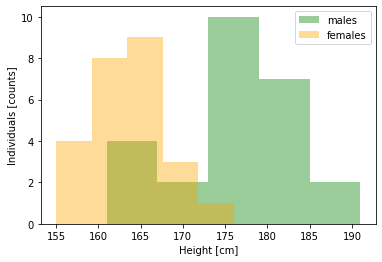

In [5]:
# Plot the height of the two sampled cohorts.
plt.hist(sample1['50-0.0'], bins=5, alpha=0.4, color='green', label = 'males')
plt.hist(sample2['50-0.0'], bins=5, alpha = 0.4, color='orange', label = 'females')
plt.xlabel("Height [cm]")
plt.ylabel("Individuals [counts]")
plt.legend()

**Which is the appropriate test to check whether the two sampled cohorts have the same height?**

The test to be used is the t-test (small sample size from two samples)


**State the null hypothesis, state the alternate hypothesis.**
* Null hypothesis: the two sampled cohorts belong to the same population, therefore their height is identical.
* Alternate hypothesis: the two sampled cohorts come from two different populations, therefore their height is different.

**Define the significance threshold.**

Significance threshold is 0.05 from a two-tailed test (we do not know already if one sample is bigger than the other)


In [6]:
# run the test

stats.ttest_ind(sample1['50-0.0'], sample2['50-0.0'])

Ttest_indResult(statistic=6.764730493915301, pvalue=1.6877888059749444e-08)

**Interpret the results**

The two samples do not come from the same population (p-value is less than the pre-determined significance threshold).



### Part b
Sample two groups of 25 males, run a statistical test to check if the height of the two groups are different. 
* Run 1000 simulations of similar samples and statistical tests, and save each p-value in an array.

* Plot the distribution of the p-values of the statistical tests.

* What do you notice?  

Ttest_indResult(statistic=-0.44757540538745827, pvalue=0.6564730992012868)

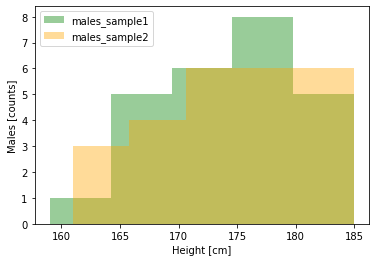

In [7]:
# Sample two groups of 25 males, 
# run a statistical test to check if the height of the two groups are different

males = df['31-0.0'] == 1
sample1 = df[males].sample(25)
sample2 = df[males].sample(25)

# Plot the height of the two sampled cohorts.
plt.hist(sample1['50-0.0'], bins=5, alpha=0.4, color='green', label = 'males_sample1')
plt.hist(sample2['50-0.0'], bins=5, alpha = 0.4, color='orange', label = 'males_sample2')
plt.xlabel("Height [cm]")
plt.ylabel("Males [counts]")
plt.legend()

stats.ttest_ind(sample1['50-0.0'], sample2['50-0.0'])

In [8]:
# Run 1000 simulations of similar samples and statistical tests, 
# and save each p-value in an array.
pvals = np.array([])
for i in range(1000):
  sample1 = df[males].sample(25)
  sample2 = df[males].sample(25)
  tstat, pvalue = stats.ttest_ind(sample1['50-0.0'], sample2['50-0.0'])
  pvals = np.append(pvals, pvalue)



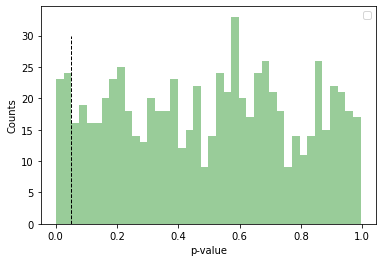

In [9]:
# Plot the distribution of the p-values of the statistical tests.

plt.hist(pvals, alpha=0.4, color='green', bins = 40)
plt.vlines(x=0.05, ymin=0, ymax = 30, linestyle ='--', linewidth = 1)
plt.xlabel("p-value")
plt.ylabel("Counts")
plt.legend()

In [10]:
len(pvals[pvals<0.05])/len(pvals)

0.045

**What do you notice?**

A proportion of statistical test (3.9%) have pvalues below the statistical threshold, even though the samples come from the same population.





# Exercise 2
Check whether the waist circuference of the male population and females population is different.

* Plot the waist circuference of the two sampled cohorts.

* Which statistical test are you going to use?

* State the null hypothesis, state the alternate hypothesis.

* Define the significance threshold.





* How do you interpret the results?



In [ ]:
# Check whether the waist circuference of the male population and females population is different
males = df['31-0.0'] == 1
females = df['31-0.0'] == 0

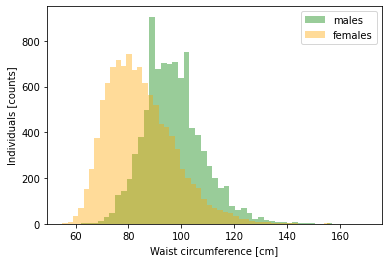

In [ ]:
# Plot the waist circumference of the two populations
plt.hist(df[males]['48-0.0'], alpha=0.4, color='green', label = 'males', bins = 50)
plt.hist(df[females]['48-0.0'], alpha = 0.4, color='orange', label = 'females', bins = 50)
plt.xlabel("Waist circumference [cm]")
plt.ylabel("Individuals [counts]")
plt.legend()

**Which statistical test are you going to use?**

Z-test (because we are comparing two populations)

**State the null hypothesis, state the alternate hypothesis.**

* Null hypothesis: the two populations have same mean for waist circumference.

* Alternate hypothesis: the two populations have different mean for waist circumference.

**Define the significance threshold.**

Significance threshold will be 0.05 from a two-tailed test (we do not know already if the mean of one population is bigger than the other)

In [11]:
# remove nan
df = df.dropna(subset=['48-0.0'])
males = df['31-0.0'] == 1
females = df['31-0.0'] == 0
stats, pvalue = ztest(df[males]['48-0.0'], df[females]['48-0.0'], alternative='two-sided')

In [12]:
print(pvalue)

0.0


**How do you interpret the results?**

The two populations have significantly different mean for waist circumference because the pvalue of the statistical test is less than the 0.05 significance threshold.

# Exercise 3
Is diabetes and age related?

* Divide the population in different age brackets. 

* Plot the percentage of diabetic patients among the different age buckets.

* Which statistical test are you going to use?

* State the null hypothesis, state the alternate hypothesis.

* Define the significance threshold.

* Run the test and interpret the results.

Text(0, 0.5, 'Individuals [counts]')

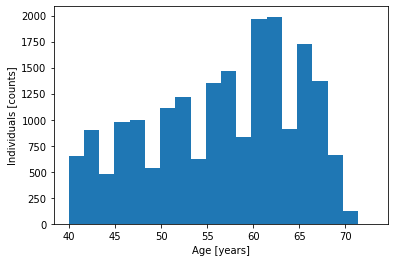

In [13]:
# Divide the population in different age brackets.

# check the age distribution first to determine the age brackets
# Diabetes diagnosed by doctor	2443-0.0
#	AgeRecruit	21022-0.0

plt.hist(df['21022-0.0'], bins=20)
plt.xlabel('Age [years]')
plt.ylabel('Individuals [counts]')

In [14]:
# let's divide the population in 5 groups
age = {}
age[0] = df['21022-0.0']<50
age[1] = (df['21022-0.0']>=50) & (df['21022-0.0']<55)
age[2] = (df['21022-0.0']>=55) & (df['21022-0.0']<60)
age[3] = (df['21022-0.0']>=60) & (df['21022-0.0']<65)
age[4] = df['21022-0.0']>=65 

In [15]:
[len(df[age[i]]['21022-0.0']) for i in range(5)]

[4549, 2958, 3648, 4863, 3898]

Text(0, 0.5, 'Individuals [counts]')

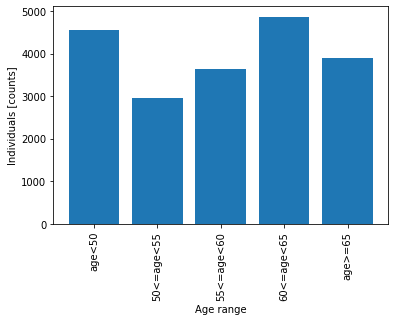

In [16]:
plt.bar(height= [len(df[age[i]]['21022-0.0']) for i in range(5)], 
        x = ['age<50','50<=age<55','55<=age<60','60<=age<65','age>=65'])
plt.xlabel('Age range')
plt.xticks(rotation = 90)
plt.ylabel('Individuals [counts]')

In [17]:
[df[age[i]]['2443-0.0'].value_counts(normalize = True).at[1] for i in range(5)]

[0.027722772277227723,
 0.04027072758037225,
 0.0523861766319254,
 0.06177924217462932,
 0.0829907502569373]

Text(0, 0.5, 'Diabetic individuals [%')

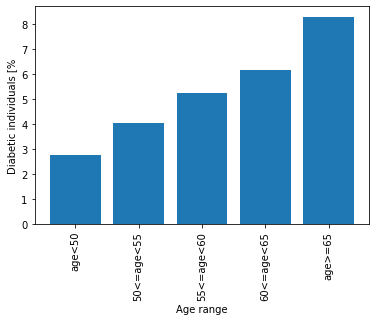

In [18]:
# Plot the percentage of diabetic patients among the different age buckets


plt.bar(height= [100* df[age[i]]['2443-0.0'].value_counts(normalize = True).at[1] for i in range(5)], 
        x = ['age<50','50<=age<55','55<=age<60','60<=age<65','age>=65'])
plt.xlabel('Age range')
plt.xticks(rotation = 90)
plt.ylabel('Diabetic individuals [%')

**Which statistical test are you going to use?**

 Chi-square

**State the null hypothesis, state the alternate hypothesis.**
* Null hypothesis: the different age ranges have *identical* proportion of diabetic individuals
* Alternate hypothesis: the different age ranges have *different* proportion of diabetic individuals

**Define the significance threshold.**

Significance threshold will be 0.05 from a two-tailed test (we do not know already if one population has a bigger/smaller proportion than the others)


In [19]:
# Run the test and interpret the results.

#create a categorical column for age ranges

conditions = [df['21022-0.0']<50,  (df['21022-0.0']>=50) & (df['21022-0.0']<55),
              (df['21022-0.0']>=55) & (df['21022-0.0']<60),
              (df['21022-0.0']>=60) & (df['21022-0.0']<65),
              df['21022-0.0']>=65 ]
choices = ['age<50','50<=age<55','55<=age<60','60<=age<65','age>=65']

df['age_range'] = np.select(conditions, choices, default = np.nan)

df['age_range'].value_counts()

60<=age<65    4863
age<50        4549
age>=65       3898
55<=age<60    3648
50<=age<55    2958
Name: age_range, dtype: int64

In [20]:
# clean the data for diabetic patients 

df = df[df['2443-0.0'] >=0]

In [21]:
data_crosstab = pd.crosstab(df['age_range'],
                            df['2443-0.0'],
                           margins=True, margins_name="Total")

In [22]:
data_crosstab

2443-0.0,0.0,1.0,Total
age_range,,,
50<=age<55,2826,119,2945
55<=age<60,3441,191,3632
60<=age<65,4544,300,4844
age<50,4399,126,4525
age>=65,3556,323,3879
Total,18766,1059,19825


In [23]:
import scipy
stat, p, dof, expected = scipy.stats.chi2_contingency(data_crosstab.iloc[0:-1,0:-1])
print('pvalue: ', p)
print('degrees of freedom: ', dof)
print('expected ', expected)

pvalue:  4.475063422922974e-30
degrees of freedom:  4
expected  [[2787.68575032  157.31424968]
 [3437.98799496  194.01200504]
 [4585.2461034   258.7538966 ]
 [4283.28625473  241.71374527]
 [3671.7938966   207.2061034 ]]


**Interpret the results**

The percentage of diabetic individuals significantly differs across different age ranges (the obtained p-value of the chi-square distribution is lower than the defined threshold).